In [1]:
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


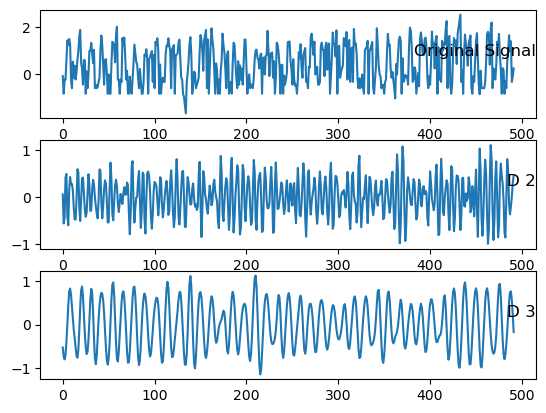

In [22]:
from pandas import read_csv
from matplotlib import pyplot
# load dataset
dataset = read_csv('wavelet_coefficients_coif4.csv')
values = dataset.values
# specify columns to plot
groups = [0,3,4]
i = 1
# plot each column
pyplot.figure()
for group in groups:
	pyplot.subplot(len(groups), 1, i)
	pyplot.plot(values[:, group])
	pyplot.title(dataset.columns[group], y=0.5, loc='right')
	i += 1
pyplot.show()

In [23]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg



In [24]:
# load dataset
dataset = read_csv('wavelet_coefficients_coif4.csv')
dataset=dataset.drop(['D 2','D 1'], axis=1)


In [25]:
dataset

,Original Signal,Approximation,D 3,D 4
0,-0.10,0.478147,-0.524884,0.568582
1,-0.86,0.497281,-0.728874,0.611071
2,-0.25,0.515707,-0.796257,0.600825
3,-0.25,0.531488,-0.693861,0.539186
4,0.55,0.543428,-0.395874,0.428453
...,...,...,...,...
487,0.95,0.387621,0.735234,-0.158077
488,1.40,0.407055,0.760722,-0.012680
489,-0.35,0.425291,0.553173,0.155749
490,-0.12,0.442725,0.220372,0.326657


In [30]:
values = dataset.values
# integer encode direction
encoder = LabelEncoder()
values[:,3] = encoder.fit_transform(values[:,3])
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
print(reframed)
# # drop columns we don't want to predict
# reframed.drop(reframed.columns[[2,3,6]], axis=1, inplace=True)
# print(reframed.head())

     var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)   var1(t)   var2(t)   var3(t)  \
1     0.377934   0.515926   0.271792   0.995927  0.199530  0.530810  0.181733   
2     0.199530   0.530810   0.181733   1.000000  0.342723  0.545144  0.151984   
3     0.342723   0.545144   0.151984   0.997963  0.342723  0.557421  0.197191   
4     0.342723   0.557421   0.197191   0.989817  0.530516  0.566710  0.328748   
5     0.530516   0.566710   0.328748   0.961304  0.739437  0.572835  0.505702   
..         ...        ...        ...        ...       ...       ...       ...   
487   0.791080   0.429723   0.736002   0.114053  0.624413  0.445503  0.828119   
488   0.624413   0.445503   0.828119   0.219959  0.730047  0.460620  0.839372   
489   0.730047   0.460620   0.839372   0.509165  0.319249  0.474807  0.747741   
490   0.319249   0.474807   0.747741   0.763748  0.373239  0.488369  0.600814   
491   0.373239   0.488369   0.600814   0.914460  0.455399  0.501811  0.428390   

      var4(t)  
1    1.0000

In [31]:
reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var1(t),var2(t),var3(t),var4(t)
1,0.377934,0.515926,0.271792,0.995927,0.199530,0.530810,0.181733,1.000000
2,0.199530,0.530810,0.181733,1.000000,0.342723,0.545144,0.151984,0.997963
3,0.342723,0.545144,0.151984,0.997963,0.342723,0.557421,0.197191,0.989817
4,0.342723,0.557421,0.197191,0.989817,0.530516,0.566710,0.328748,0.961304
5,0.530516,0.566710,0.328748,0.961304,0.739437,0.572835,0.505702,0.877800
...,...,...,...,...,...,...,...,...
487,0.791080,0.429723,0.736002,0.114053,0.624413,0.445503,0.828119,0.219959
488,0.624413,0.445503,0.828119,0.219959,0.730047,0.460620,0.839372,0.509165
489,0.730047,0.460620,0.839372,0.509165,0.319249,0.474807,0.747741,0.763748
490,0.319249,0.474807,0.747741,0.763748,0.373239,0.488369,0.600814,0.914460


In [32]:

# split into train and test sets
values = reframed.values
n_train_hours = 392
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(392, 1, 7) (392,) (99, 1, 7) (99,)


In [33]:
# design network
model = Sequential()
model.add(LSTM(100, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=500, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/500
6/6 - 2s - loss: 0.4466 - val_loss: 0.3879 - 2s/epoch - 374ms/step
Epoch 2/500
6/6 - 0s - loss: 0.3643 - val_loss: 0.3195 - 45ms/epoch - 7ms/step
Epoch 3/500
6/6 - 0s - loss: 0.3066 - val_loss: 0.2632 - 40ms/epoch - 7ms/step
Epoch 4/500
6/6 - 0s - loss: 0.2743 - val_loss: 0.2267 - 41ms/epoch - 7ms/step
Epoch 5/500
6/6 - 0s - loss: 0.2581 - val_loss: 0.2060 - 40ms/epoch - 7ms/step
Epoch 6/500
6/6 - 0s - loss: 0.2504 - val_loss: 0.1997 - 39ms/epoch - 6ms/step
Epoch 7/500
6/6 - 0s - loss: 0.2455 - val_loss: 0.1953 - 40ms/epoch - 7ms/step
Epoch 8/500
6/6 - 0s - loss: 0.2395 - val_loss: 0.1906 - 40ms/epoch - 7ms/step
Epoch 9/500
6/6 - 0s - loss: 0.2326 - val_loss: 0.1862 - 47ms/epoch - 8ms/step
Epoch 10/500
6/6 - 0s - loss: 0.2260 - val_loss: 0.1824 - 52ms/epoch - 9ms/step
Epoch 11/500
6/6 - 0s - loss: 0.2196 - val_loss: 0.1778 - 45ms/epoch - 7ms/step
Epoch 12/500
6/6 - 0s - loss: 0.2126 - val_loss: 0.1721 - 40ms/epoch - 7ms/step
Epoch 13/500
6/6 - 0s - loss: 0.2049 - val_loss: 

Epoch 104/500
6/6 - 0s - loss: 0.0728 - val_loss: 0.0699 - 40ms/epoch - 7ms/step
Epoch 105/500
6/6 - 0s - loss: 0.0728 - val_loss: 0.0701 - 40ms/epoch - 7ms/step
Epoch 106/500
6/6 - 0s - loss: 0.0728 - val_loss: 0.0702 - 40ms/epoch - 7ms/step
Epoch 107/500
6/6 - 0s - loss: 0.0727 - val_loss: 0.0706 - 41ms/epoch - 7ms/step
Epoch 108/500
6/6 - 0s - loss: 0.0729 - val_loss: 0.0693 - 43ms/epoch - 7ms/step
Epoch 109/500
6/6 - 0s - loss: 0.0727 - val_loss: 0.0708 - 39ms/epoch - 7ms/step
Epoch 110/500
6/6 - 0s - loss: 0.0727 - val_loss: 0.0699 - 40ms/epoch - 7ms/step
Epoch 111/500
6/6 - 0s - loss: 0.0727 - val_loss: 0.0699 - 41ms/epoch - 7ms/step
Epoch 112/500
6/6 - 0s - loss: 0.0726 - val_loss: 0.0701 - 53ms/epoch - 9ms/step
Epoch 113/500
6/6 - 0s - loss: 0.0726 - val_loss: 0.0699 - 43ms/epoch - 7ms/step
Epoch 114/500
6/6 - 0s - loss: 0.0725 - val_loss: 0.0703 - 43ms/epoch - 7ms/step
Epoch 115/500
6/6 - 0s - loss: 0.0726 - val_loss: 0.0697 - 43ms/epoch - 7ms/step
Epoch 116/500
6/6 - 0s - los

6/6 - 0s - loss: 0.0696 - val_loss: 0.0699 - 38ms/epoch - 6ms/step
Epoch 206/500
6/6 - 0s - loss: 0.0695 - val_loss: 0.0697 - 40ms/epoch - 7ms/step
Epoch 207/500
6/6 - 0s - loss: 0.0694 - val_loss: 0.0697 - 41ms/epoch - 7ms/step
Epoch 208/500
6/6 - 0s - loss: 0.0693 - val_loss: 0.0699 - 41ms/epoch - 7ms/step
Epoch 209/500
6/6 - 0s - loss: 0.0693 - val_loss: 0.0702 - 40ms/epoch - 7ms/step
Epoch 210/500
6/6 - 0s - loss: 0.0695 - val_loss: 0.0695 - 40ms/epoch - 7ms/step
Epoch 211/500
6/6 - 0s - loss: 0.0693 - val_loss: 0.0697 - 39ms/epoch - 6ms/step
Epoch 212/500
6/6 - 0s - loss: 0.0691 - val_loss: 0.0704 - 39ms/epoch - 7ms/step
Epoch 213/500
6/6 - 0s - loss: 0.0694 - val_loss: 0.0697 - 42ms/epoch - 7ms/step
Epoch 214/500
6/6 - 0s - loss: 0.0693 - val_loss: 0.0698 - 41ms/epoch - 7ms/step
Epoch 215/500
6/6 - 0s - loss: 0.0691 - val_loss: 0.0699 - 40ms/epoch - 7ms/step
Epoch 216/500
6/6 - 0s - loss: 0.0692 - val_loss: 0.0696 - 42ms/epoch - 7ms/step
Epoch 217/500
6/6 - 0s - loss: 0.0690 - va

Epoch 307/500
6/6 - 0s - loss: 0.0666 - val_loss: 0.0699 - 40ms/epoch - 7ms/step
Epoch 308/500
6/6 - 0s - loss: 0.0666 - val_loss: 0.0699 - 39ms/epoch - 6ms/step
Epoch 309/500
6/6 - 0s - loss: 0.0666 - val_loss: 0.0699 - 39ms/epoch - 6ms/step
Epoch 310/500
6/6 - 0s - loss: 0.0667 - val_loss: 0.0697 - 40ms/epoch - 7ms/step
Epoch 311/500
6/6 - 0s - loss: 0.0666 - val_loss: 0.0697 - 40ms/epoch - 7ms/step
Epoch 312/500
6/6 - 0s - loss: 0.0665 - val_loss: 0.0701 - 42ms/epoch - 7ms/step
Epoch 313/500
6/6 - 0s - loss: 0.0666 - val_loss: 0.0700 - 39ms/epoch - 7ms/step
Epoch 314/500
6/6 - 0s - loss: 0.0667 - val_loss: 0.0698 - 40ms/epoch - 7ms/step
Epoch 315/500
6/6 - 0s - loss: 0.0665 - val_loss: 0.0701 - 45ms/epoch - 8ms/step
Epoch 316/500
6/6 - 0s - loss: 0.0664 - val_loss: 0.0704 - 41ms/epoch - 7ms/step
Epoch 317/500
6/6 - 0s - loss: 0.0665 - val_loss: 0.0702 - 43ms/epoch - 7ms/step
Epoch 318/500
6/6 - 0s - loss: 0.0665 - val_loss: 0.0699 - 39ms/epoch - 7ms/step
Epoch 319/500
6/6 - 0s - los

6/6 - 0s - loss: 0.0652 - val_loss: 0.0717 - 43ms/epoch - 7ms/step
Epoch 409/500
6/6 - 0s - loss: 0.0654 - val_loss: 0.0715 - 40ms/epoch - 7ms/step
Epoch 410/500
6/6 - 0s - loss: 0.0654 - val_loss: 0.0711 - 40ms/epoch - 7ms/step
Epoch 411/500
6/6 - 0s - loss: 0.0652 - val_loss: 0.0708 - 40ms/epoch - 7ms/step
Epoch 412/500
6/6 - 0s - loss: 0.0650 - val_loss: 0.0713 - 38ms/epoch - 6ms/step
Epoch 413/500
6/6 - 0s - loss: 0.0656 - val_loss: 0.0708 - 37ms/epoch - 6ms/step
Epoch 414/500
6/6 - 0s - loss: 0.0653 - val_loss: 0.0708 - 37ms/epoch - 6ms/step
Epoch 415/500
6/6 - 0s - loss: 0.0650 - val_loss: 0.0710 - 38ms/epoch - 6ms/step
Epoch 416/500
6/6 - 0s - loss: 0.0650 - val_loss: 0.0711 - 40ms/epoch - 7ms/step
Epoch 417/500
6/6 - 0s - loss: 0.0653 - val_loss: 0.0710 - 39ms/epoch - 6ms/step
Epoch 418/500
6/6 - 0s - loss: 0.0651 - val_loss: 0.0711 - 42ms/epoch - 7ms/step
Epoch 419/500
6/6 - 0s - loss: 0.0650 - val_loss: 0.0711 - 40ms/epoch - 7ms/step
Epoch 420/500
6/6 - 0s - loss: 0.0649 - va

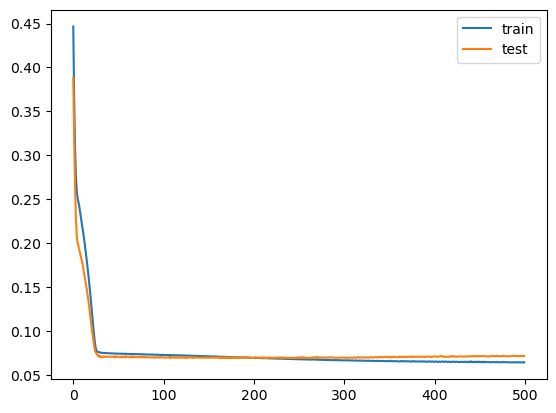

In [34]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [35]:
final_predictions = model.predict(test_X)
print(final_predictions.shape)

4/4 [==============================] - 0s 2ms/step
(99, 1)


In [36]:
train_predictions = model.predict(train_X)
print(train_predictions.shape)

13/13 [==============================] - 0s 2ms/step
(392, 1)


In [37]:
import pandas as pd
pd.DataFrame(train_y).to_csv('actualTrainLSTM .csv', index=False, header=False)
pd.DataFrame(train_predictions).to_csv('predictTrainLSTM .csv', index=False, header=False)
pd.DataFrame(test_y).to_csv('actualTestLSTM.csv', index=False, header=False)
pd.DataFrame(final_predictions).to_csv('predictTestLSTM.csv', index=False, header=False)

In [38]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_evaluation_metrics(y_observed, y_predicted):
     # Convert to NumPy arrays if they are lists
    if isinstance(y_observed, list):
        y_observed = np.array(y_observed)
    if isinstance(y_predicted, list):
        y_predicted = np.array(y_predicted)
        
    metrics = {}

    # Calculate ME (Mean Error)
    metrics['ME'] = np.mean(y_observed - y_predicted)

    # Calculate MAE (Mean Absolute Error)
    metrics['MAE'] = mean_absolute_error(y_observed, y_predicted)

    # Calculate MSE (Mean Squared Error)
    metrics['MSE'] = mean_squared_error(y_observed, y_predicted)

    # Calculate RMSE (Root Mean Squared Error)
    metrics['RMSE'] = np.sqrt(metrics['MSE'])

    # Calculate NRMSE (Normalized Root Mean Squared Error)
    metrics['NRMSE'] = metrics['RMSE'] / (np.max(y_observed) - np.min(y_observed))

    # Calculate PBIAS (Percent Bias)
    metrics['PBIAS'] = np.mean(100 * (y_observed - y_predicted) / np.mean(y_observed))

    # Calculate RSR (Root Mean Square Ratio)
    metrics['RSR'] = metrics['RMSE'] / np.std(y_observed)

    # Calculate rSD (Ratio of the Standard Deviation)
    metrics['rSD'] = np.std(y_observed - y_predicted) / np.std(y_observed)

    # Calculate NSE (Nash-Sutcliffe Efficiency)
    metrics['NSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate mNSE (Modified Nash-Sutcliffe Efficiency)
    metrics['mNSE'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((y_observed - np.mean(y_observed)) ** 2))

    # Calculate rNSE (Relative Nash-Sutcliffe Efficiency)
    metrics['rNSE'] = metrics['NSE'] / np.var(y_observed)

    # Calculate d (Index of Agreement)
    metrics['d'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                       np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate md (Modified d Index)
    metrics['md'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate rd (Relative d Index)
    metrics['rd'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - np.mean(y_observed)) +
                                                                         np.abs(y_observed - np.mean(y_observed))) ** 2))

    # Calculate cp (Coefficient of Performance)
    metrics['cp'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                         np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate r (Index of Agreement)
    metrics['r'] = 1 - (np.sum((y_observed - y_predicted) ** 2) / np.sum((np.abs(y_predicted - y_observed.mean()) +
                                                                        np.abs(y_observed - y_observed.mean())) ** 2))

    # Calculate R2 (Coefficient of Determination)
    metrics['R2'] = r2_score(y_observed, y_predicted)

    return metrics


In [39]:
evaluation_metrics = calculate_evaluation_metrics(test_y, final_predictions)
print(evaluation_metrics)

{'ME': -0.0034659884, 'MAE': 0.07170377, 'MSE': 0.009106351, 'RMSE': 0.0954272, 'NRMSE': 0.101198174, 'PBIAS': -0.69584656, 'RSR': 0.36682495, 'rSD': 1.3904923, 'NSE': -190.43099975585938, 'mNSE': -190.43099975585938, 'rNSE': -2813.915450917358, 'd': 0.41922420263290405, 'md': 0.41922420263290405, 'rd': 0.41922420263290405, 'cp': 0.41922420263290405, 'r': 0.41922420263290405, 'R2': 0.8654394582573679}


In [40]:
from keras.models import Sequential
from keras.layers import GRU, Dense

# Design network
model = Sequential()
model.add(GRU(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')

# Fit network
history = model.fit(train_X, train_y, epochs=120, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)


Epoch 1/120
6/6 - 2s - loss: 0.6347 - val_loss: 0.5477 - 2s/epoch - 339ms/step
Epoch 2/120
6/6 - 0s - loss: 0.5019 - val_loss: 0.4244 - 40ms/epoch - 7ms/step
Epoch 3/120
6/6 - 0s - loss: 0.3892 - val_loss: 0.3289 - 37ms/epoch - 6ms/step
Epoch 4/120
6/6 - 0s - loss: 0.3123 - val_loss: 0.2578 - 39ms/epoch - 6ms/step
Epoch 5/120
6/6 - 0s - loss: 0.2738 - val_loss: 0.2191 - 38ms/epoch - 6ms/step
Epoch 6/120
6/6 - 0s - loss: 0.2571 - val_loss: 0.2058 - 38ms/epoch - 6ms/step
Epoch 7/120
6/6 - 0s - loss: 0.2501 - val_loss: 0.2009 - 39ms/epoch - 7ms/step
Epoch 8/120
6/6 - 0s - loss: 0.2446 - val_loss: 0.1959 - 37ms/epoch - 6ms/step
Epoch 9/120
6/6 - 0s - loss: 0.2371 - val_loss: 0.1899 - 37ms/epoch - 6ms/step
Epoch 10/120
6/6 - 0s - loss: 0.2287 - val_loss: 0.1849 - 38ms/epoch - 6ms/step
Epoch 11/120
6/6 - 0s - loss: 0.2210 - val_loss: 0.1807 - 39ms/epoch - 6ms/step
Epoch 12/120
6/6 - 0s - loss: 0.2139 - val_loss: 0.1753 - 38ms/epoch - 6ms/step
Epoch 13/120
6/6 - 0s - loss: 0.2059 - val_loss: 

Epoch 104/120
6/6 - 0s - loss: 0.0722 - val_loss: 0.0703 - 35ms/epoch - 6ms/step
Epoch 105/120
6/6 - 0s - loss: 0.0722 - val_loss: 0.0702 - 34ms/epoch - 6ms/step
Epoch 106/120
6/6 - 0s - loss: 0.0722 - val_loss: 0.0702 - 37ms/epoch - 6ms/step
Epoch 107/120
6/6 - 0s - loss: 0.0721 - val_loss: 0.0706 - 46ms/epoch - 8ms/step
Epoch 108/120
6/6 - 0s - loss: 0.0721 - val_loss: 0.0708 - 37ms/epoch - 6ms/step
Epoch 109/120
6/6 - 0s - loss: 0.0721 - val_loss: 0.0710 - 35ms/epoch - 6ms/step
Epoch 110/120
6/6 - 0s - loss: 0.0721 - val_loss: 0.0700 - 35ms/epoch - 6ms/step
Epoch 111/120
6/6 - 0s - loss: 0.0722 - val_loss: 0.0704 - 35ms/epoch - 6ms/step
Epoch 112/120
6/6 - 0s - loss: 0.0720 - val_loss: 0.0709 - 34ms/epoch - 6ms/step
Epoch 113/120
6/6 - 0s - loss: 0.0720 - val_loss: 0.0702 - 39ms/epoch - 7ms/step
Epoch 114/120
6/6 - 0s - loss: 0.0721 - val_loss: 0.0702 - 38ms/epoch - 6ms/step
Epoch 115/120
6/6 - 0s - loss: 0.0720 - val_loss: 0.0710 - 36ms/epoch - 6ms/step
Epoch 116/120
6/6 - 0s - los

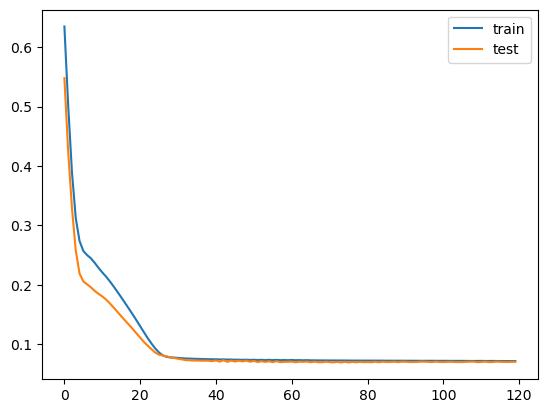

In [41]:
# plot history
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [42]:
final_predictions = model.predict(test_X)
print(final_predictions.shape)

4/4 [==============================] - 0s 1ms/step
(99, 1)


In [43]:
train_predictions = model.predict(train_X)
print(train_predictions.shape)

13/13 [==============================] - 0s 1ms/step
(392, 1)


In [44]:
pd.DataFrame(train_y).to_csv('actualTrainGRU .csv', index=False, header=False)
pd.DataFrame(train_predictions).to_csv('predictTrainGRU.csv', index=False, header=False)
pd.DataFrame(test_y).to_csv('actualTestGRU.csv', index=False, header=False)
pd.DataFrame(final_predictions).to_csv('predictTestGRU.csv', index=False, header=False)

In [45]:
evaluation_metrics = calculate_evaluation_metrics(test_y, final_predictions)
print(evaluation_metrics)

{'ME': 0.008404586, 'MAE': 0.07057741, 'MSE': 0.008581772, 'RMSE': 0.09263786, 'NRMSE': 0.098240145, 'PBIAS': 1.6873394, 'RSR': 0.35610265, 'rSD': 1.3815747, 'NSE': -188.06942749023438, 'mNSE': -188.06942749023438, 'rNSE': -2779.019532210742, 'd': 0.4186174273490906, 'md': 0.4186174273490906, 'rd': 0.4186174273490906, 'cp': 0.4186174273490906, 'r': 0.4186174273490906, 'R2': 0.8731909280929919}
